# **Exploratory Data Analysis**

---
---

**Data dictionary & problem description:**

Problem: predicting, based on measurements of contaminants collected over a year, whether it may be harmful to health or not.

- FECHA. Date recorded at the time of taking pollutant values (numeric)
- N_CCAA. Name of each autonomous community in Spain where measurement data for each pollutant has been collected (categorical)
- PROVINCIA. Name of each province where measurement data for each pollutant has been collected (categorical)
- N_MUNICIPIO. Name of each municipality where measurement data for each pollutant has been collected (categorical)
- ESTACION. Number assigned to each station of each autonomous community that has recorded pollutant measurement data (numeric)
- MAGNITUD. Each pollutant that has been recorded in the different stations (categorical)
- TIPO_AREA.Type of area in which they are located, urban, suburban or rural area (categorical).
- TIPO_ESTACION. According to the typology of the main emission source, traffic, industrial or background (categorical).
- LATITUD, LONGITUD. Geographic data of each station where the pollutants have been recorded (numeric)
- H01, H02, H03... H24. Recorded value per hour of each pollutant. All contaminants have been taken with unified measurement units (µg/m3)(numeric)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pickle import dump
import pickle

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
df = pd.read_csv('../data/processed/Andalucia_pollutants.csv')
df.head()

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,2022-01-04,ANDALUCÍA,ALMERÍA,ALMERÍA,4,C6H6,URBANA,TRAFICO,36.84133,-2.44672,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2022-01-05,ANDALUCÍA,ALMERÍA,ALMERÍA,4,C6H6,URBANA,TRAFICO,36.84133,-2.44672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
2,2022-01-08,ANDALUCÍA,ALMERÍA,ALMERÍA,4,C6H6,URBANA,TRAFICO,36.84133,-2.44672,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,3.0
3,2022-01-09,ANDALUCÍA,ALMERÍA,ALMERÍA,4,C6H6,URBANA,TRAFICO,36.84133,-2.44672,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
4,2022-01-12,ANDALUCÍA,ALMERÍA,ALMERÍA,4,C6H6,URBANA,TRAFICO,36.84133,-2.44672,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


### **1. Define the target**

Calculate the daily average of the hourly columns

In [24]:
# List of columns from which you want to calculate the average
columns_h = [col for col in df.columns if col.startswith('H')]

# Calculate the average of these columns for each row
df['MEDIA_DIARIA'] = df[columns_h].mean(axis=1)

Classify the value of the daily average based on the hazardousness

In [25]:
# Function to classify the hazard values of each pollutant
def classify_hazard(value, thresholds):
    if value < thresholds['Low']:
        return 'Low'
    elif value < thresholds['High']:
        return 'Normal'
    else:
        return 'High'

# Apply the function to each row of the DataFrame
def classify_row(row):
    pollutant = row['MAGNITUD']
    value = row['MEDIA_DIARIA']
    if pollutant in thresholds_hazard:
        return classify_hazard(value, thresholds_hazard[pollutant])

#Define hazard thresholds for the 8 pollutants
thresholds_hazard = {
    'SO2': {'Low': 25, 'High': 40},
    'CO': {'Low': 2, 'High': 4},
    'C6H6': {'Low': 2, 'High': 5},
    'NO2': {'Low': 15, 'High': 25},
    'PM2.5': {'Low': 10, 'High': 15},
    'PM10': {'Low': 25, 'High': 45}, 
    'NOX': {'Low': 75, 'High': 100},
    'O3': {'Low': 75, 'High': 100}
}

# Crear una nueva columna con la clasificación de peligrosidad
df['PELIGROSIDAD'] = df.apply(classify_row, axis=1)

df.head(3)

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24,MEDIA_DIARIA,PELIGROSIDAD
0,2022-01-04,ANDALUCÍA,ALMERÍA,ALMERÍA,4,C6H6,URBANA,TRAFICO,36.84133,-2.44672,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.083333,Low
1,2022-01-05,ANDALUCÍA,ALMERÍA,ALMERÍA,4,C6H6,URBANA,TRAFICO,36.84133,-2.44672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.708333,Low
2,2022-01-08,ANDALUCÍA,ALMERÍA,ALMERÍA,4,C6H6,URBANA,TRAFICO,36.84133,-2.44672,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,3.0,1.083333,Low


In [26]:
# Group by 'Danger' and obtain statistics for 'magnitude'.
stats_magnitud = df.groupby('PELIGROSIDAD')['MAGNITUD'].describe()
stats_magnitud

,count,unique,top,freq
PELIGROSIDAD,,,,
High,6360,6,NO2,2745
Low,86127,8,SO2,23710
Normal,17048,6,O3,5025


In [27]:
columns_h = [column for column in df.columns if 'H' in column]
df = df.drop(columns_h, axis=1)

In [28]:
df.drop(['ESTACION', 'N_CCAA'], axis = 1, inplace= True)

In [29]:
df.to_csv('../data/processed/clean_madrid.csv', index= False)

In [30]:
madrid_df = pd.read_csv('../data/processed/clean_madrid.csv')

In [31]:
madrid_df

,PROVINCIA,N_MUNICIPIO,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,MEDIA_DIARIA,PELIGROSIDAD
0,ALMERÍA,ALMERÍA,C6H6,URBANA,TRAFICO,36.84133,-2.44672,1.083333,Low
1,ALMERÍA,ALMERÍA,C6H6,URBANA,TRAFICO,36.84133,-2.44672,0.708333,Low
2,ALMERÍA,ALMERÍA,C6H6,URBANA,TRAFICO,36.84133,-2.44672,1.083333,Low
3,ALMERÍA,ALMERÍA,C6H6,URBANA,TRAFICO,36.84133,-2.44672,1.166667,Low
4,ALMERÍA,ALMERÍA,C6H6,URBANA,TRAFICO,36.84133,-2.44672,0.458333,Low
...,...,...,...,...,...,...,...,...,...
109530,SEVILLA,SEVILLA,SO2,URBANA,FONDO,37.38808,-5.99149,2.000000,Low
109531,SEVILLA,SEVILLA,SO2,URBANA,FONDO,37.38808,-5.99149,2.291667,Low
109532,SEVILLA,SEVILLA,SO2,URBANA,FONDO,37.38808,-5.99149,2.250000,Low
109533,SEVILLA,SEVILLA,SO2,URBANA,FONDO,37.38808,-5.99149,2.333333,Low


### **2. Analysis of univariate variables**

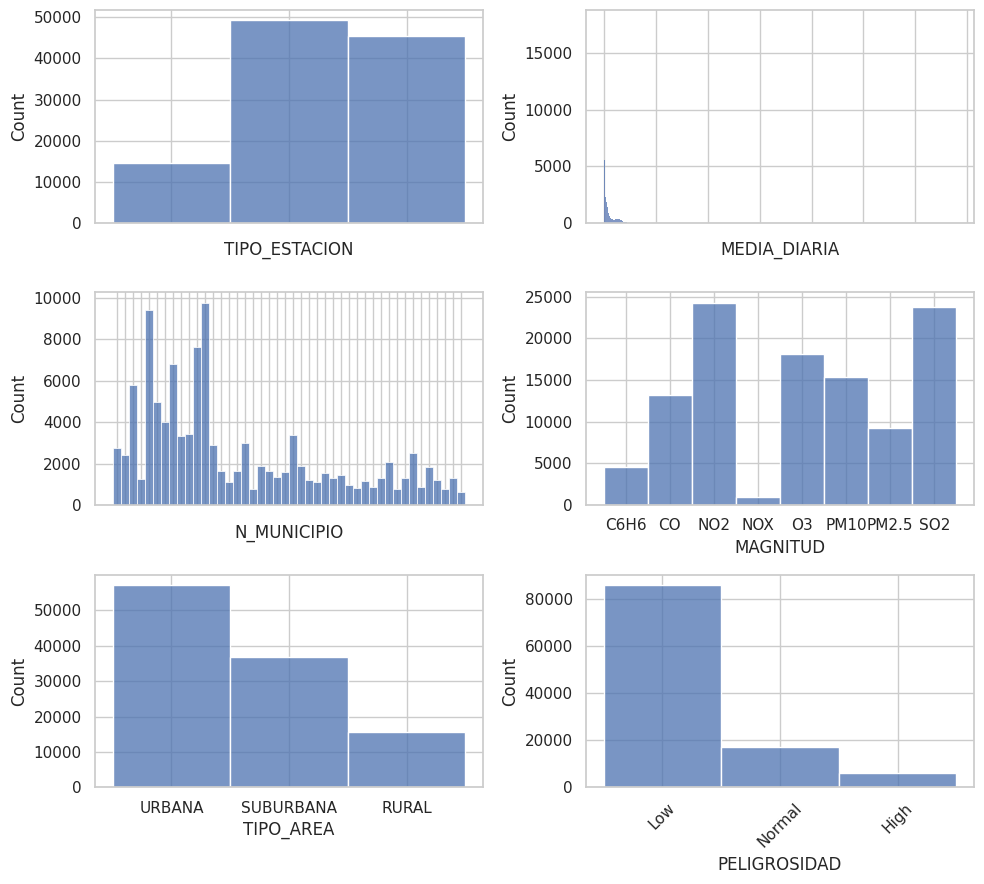

In [32]:

sns.set(style= 'whitegrid')

fig, axis = plt.subplots(3, 2, figsize=(10, 9))

# Histograms
sns.histplot(ax=axis[0, 0], data=madrid_df, x= 'TIPO_ESTACION').set_xticklabels([])
sns.histplot(ax=axis[0, 1], data=madrid_df, x= 'MEDIA_DIARIA').set_xticklabels([])
sns.histplot(ax=axis[1, 0], data=madrid_df, x= 'N_MUNICIPIO').set_xticklabels([])
sns.histplot(ax=axis[1, 1], data=madrid_df, x= 'MAGNITUD')
sns.histplot(ax=axis[2, 0], data=madrid_df, x= 'TIPO_AREA')
sns.histplot(ax=axis[2, 1], data=madrid_df, x= 'PELIGROSIDAD')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

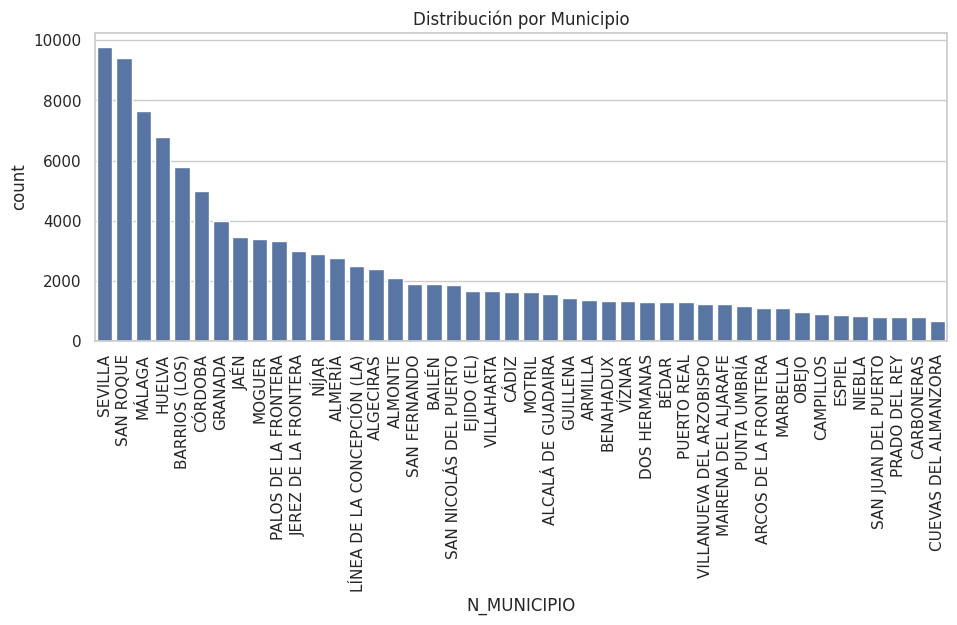

In [33]:
# Data distribution in the column 'N_MUNICIPALITY', with municipalities sorted by frequency in descending order on the x-axis. 

sns.set(style="whitegrid")

plt.figure(figsize=(11, 4))

sns.countplot(data=madrid_df, x='N_MUNICIPIO', order = madrid_df['N_MUNICIPIO'].value_counts().index)

plt.title('Distribución por Municipio')
plt.xticks(rotation=90)
plt.show()

### **3. Analysis multivariate**

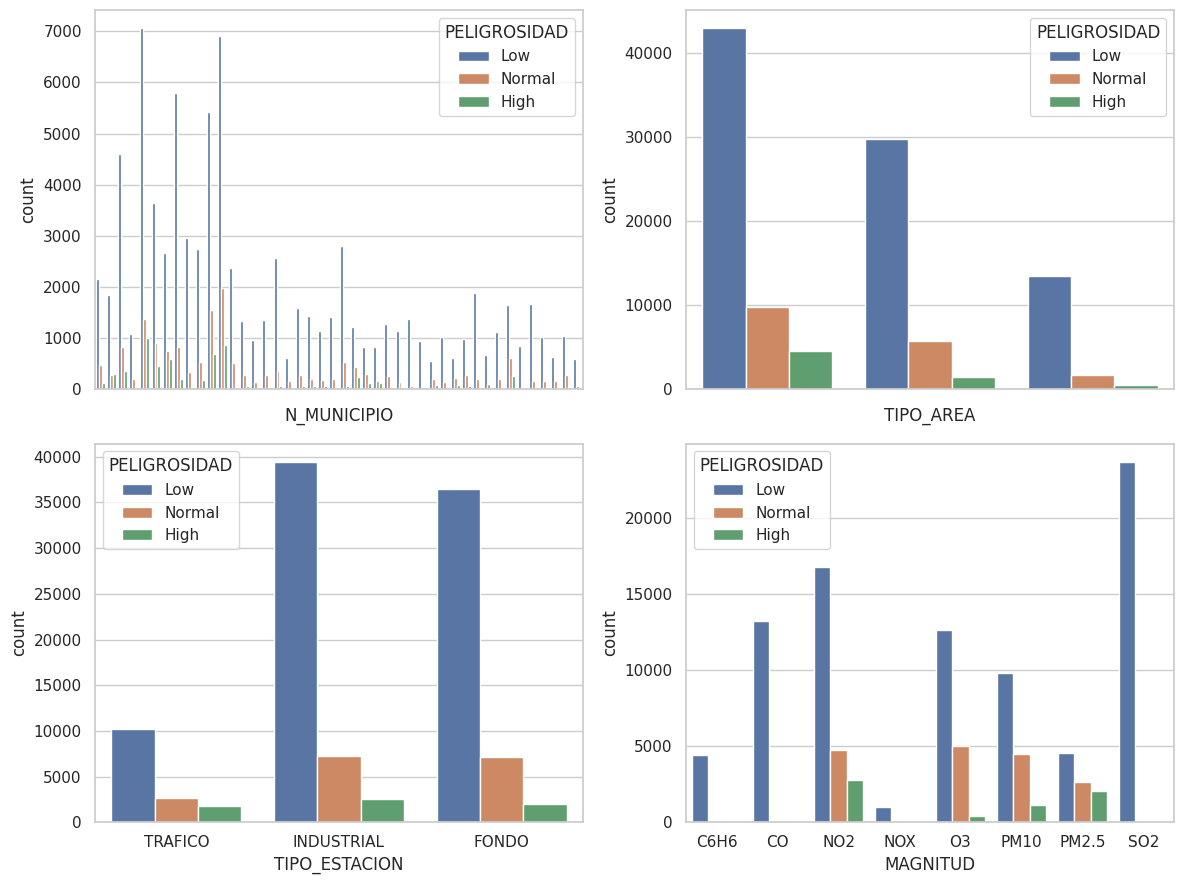

In [35]:
# Categorical-categorical analysis
fig, axis = plt.subplots(2, 2, figsize = (12, 9))

sns.countplot(ax = axis[0, 0], data = madrid_df, x = 'N_MUNICIPIO', hue = 'PELIGROSIDAD').set_xticklabels([])
sns.countplot(ax = axis[0, 1], data = madrid_df, x = 'TIPO_AREA', hue = 'PELIGROSIDAD').set_xticklabels([])
sns.countplot(ax = axis[1, 0], data = madrid_df, x = 'TIPO_ESTACION', hue = 'PELIGROSIDAD')
sns.countplot(ax = axis[1, 1], data = madrid_df, x = 'MAGNITUD', hue = 'PELIGROSIDAD')

plt.tight_layout()
plt.show()


In [36]:
madrid_df.columns

Index(['PROVINCIA', 'N_MUNICIPIO', 'MAGNITUD', 'TIPO_AREA', 'TIPO_ESTACION',
       'LATITUD', 'LONGITUD', 'MEDIA_DIARIA', 'PELIGROSIDAD'],
      dtype='object')

In [38]:
# List of columns to factor
factorize_col = ['N_MUNICIPIO', 'MAGNITUD', 'TIPO_AREA', 'TIPO_ESTACION', 'PELIGROSIDAD']

# Dictionary to store the correspondences for each column
correspondences = {}

for col in factorize_col:
    labels, unique = pd.factorize(madrid_df[col])

    # Update the DataFrame with the factored column
    madrid_df[col + '_N'] = labels

    # Store the correspondence in the dictionary using a range to represent each single value
    correspondences[col] = dict(zip(unique, range(len(unique))))

# Check DataFrame to confirm changes
madrid_df.drop(factorize_col, axis= 1, inplace= True)

In [39]:
# View the mappings for a column, e.g. 'N_CCAA' # View the mappings for a column, e.g. 'N_CCAA'.
print("Correspondences for 'MAGNITUD':", correspondences['MAGNITUD'])

Correspondences for 'MAGNITUD': {'C6H6': 0, 'CO': 1, 'NO2': 2, 'NOX': 3, 'O3': 4, 'PM10': 5, 'PM2.5': 6, 'SO2': 7}


In [40]:
# Save the dictionary in a .pk file
with open('../data/interim/factorize_values/facto_madrid.pk', 'wb') as file:
    pickle.dump(correspondences, file)

In [41]:
madrid_df.to_csv('../data/processed/factorize_csv/madrid_fct.csv', index= False)

In [42]:
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109535 entries, 0 to 109534
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PROVINCIA        109535 non-null  object 
 1   LATITUD          109535 non-null  float64
 2   LONGITUD         109535 non-null  float64
 3   MEDIA_DIARIA     109535 non-null  float64
 4   N_MUNICIPIO_N    109535 non-null  int64  
 5   MAGNITUD_N       109535 non-null  int64  
 6   TIPO_AREA_N      109535 non-null  int64  
 7   TIPO_ESTACION_N  109535 non-null  int64  
 8   PELIGROSIDAD_N   109535 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 7.5+ MB


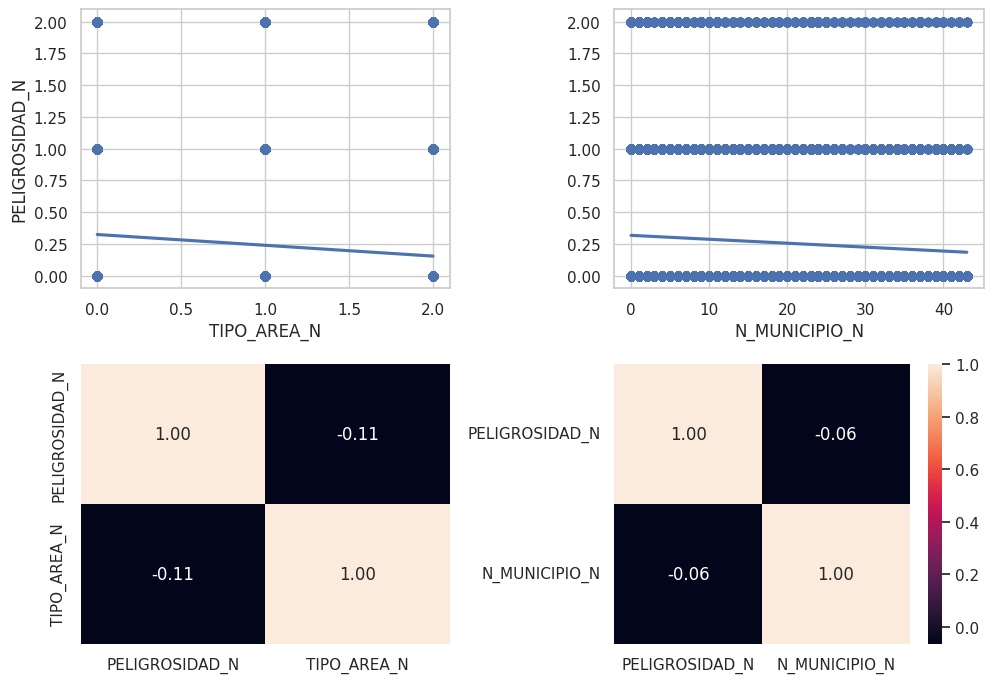

In [44]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = madrid_df, x = 'TIPO_AREA_N', y = 'PELIGROSIDAD_N')
sns.heatmap(madrid_df[['PELIGROSIDAD_N', 'TIPO_AREA_N']].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = madrid_df, x = 'N_MUNICIPIO_N', y = 'PELIGROSIDAD_N').set(ylabel=None)
sns.heatmap(madrid_df[['PELIGROSIDAD_N', 'N_MUNICIPIO_N']].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

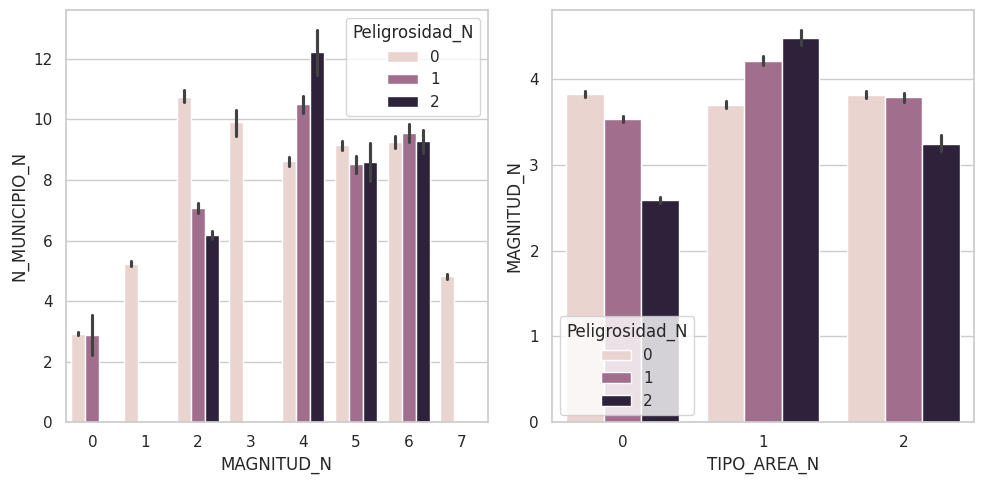

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = madrid_df, x = 'MAGNITUD_N', y = 'N_MUNICIPIO_N', hue = 'Peligrosidad_N')
sns.barplot(ax = axis[1], data = madrid_df, x = 'TIPO_AREA_N', y = 'MAGNITUD_N', hue = 'Peligrosidad_N')

plt.tight_layout()

plt.show()

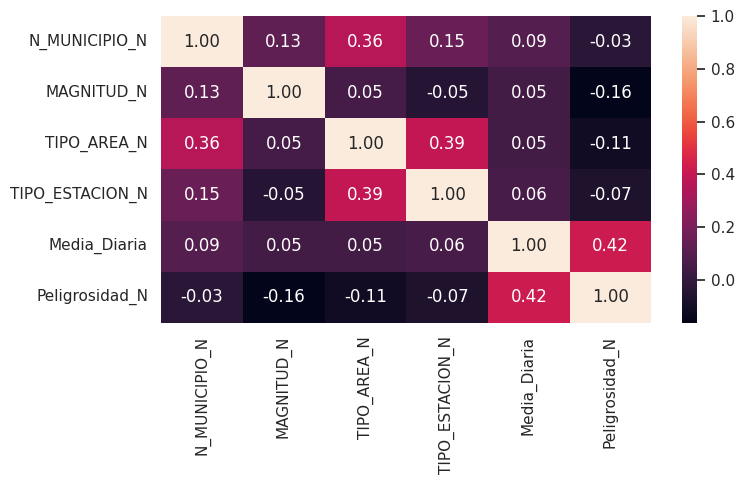

In [ ]:
# Correlation map
fig, axis = plt.subplots(figsize = (8, 5))
sns.heatmap(madrid_df[['N_MUNICIPIO_N', 'MAGNITUD_N', 'TIPO_AREA_N', 'TIPO_ESTACION_N', 'Media_Diaria', 'Peligrosidad_N']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

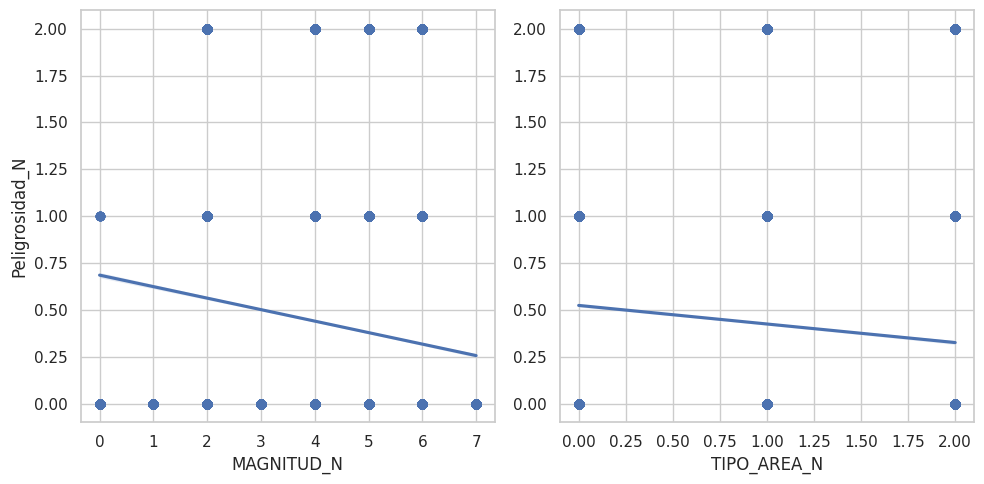

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = madrid_df, x = 'MAGNITUD_N', y = 'Peligrosidad_N')
sns.regplot(ax = axis[1], data = madrid_df, x = 'TIPO_AREA_N', y = 'Peligrosidad_N').set(ylabel = None)

plt.tight_layout()

plt.show()

### **4. Feature engineering**
**Outliers analysis**

In [ ]:
madrid_df.describe()

,LATITUD,LONGITUD,Media_Diaria,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N,Peligrosidad_N
count,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000
mean,40.446810,-3.694519,23.964349,8.059966,3.631733,0.616751,0.658897,0.462369
std,0.175136,0.227024,26.505437,6.521695,1.907187,0.814704,0.543885,0.722302
min,40.033270,-4.398100,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.341900,-3.754500,5.333333,4.000000,2.000000,0.000000,0.000000,0.000000
50%,40.421670,-3.689720,14.833333,4.000000,4.000000,0.000000,1.000000,0.000000
75%,40.479330,-3.580560,33.666667,12.000000,5.000000,1.000000,1.000000,1.000000
max,40.909000,-3.221100,715.083333,24.000000,7.000000,2.000000,2.000000,2.000000


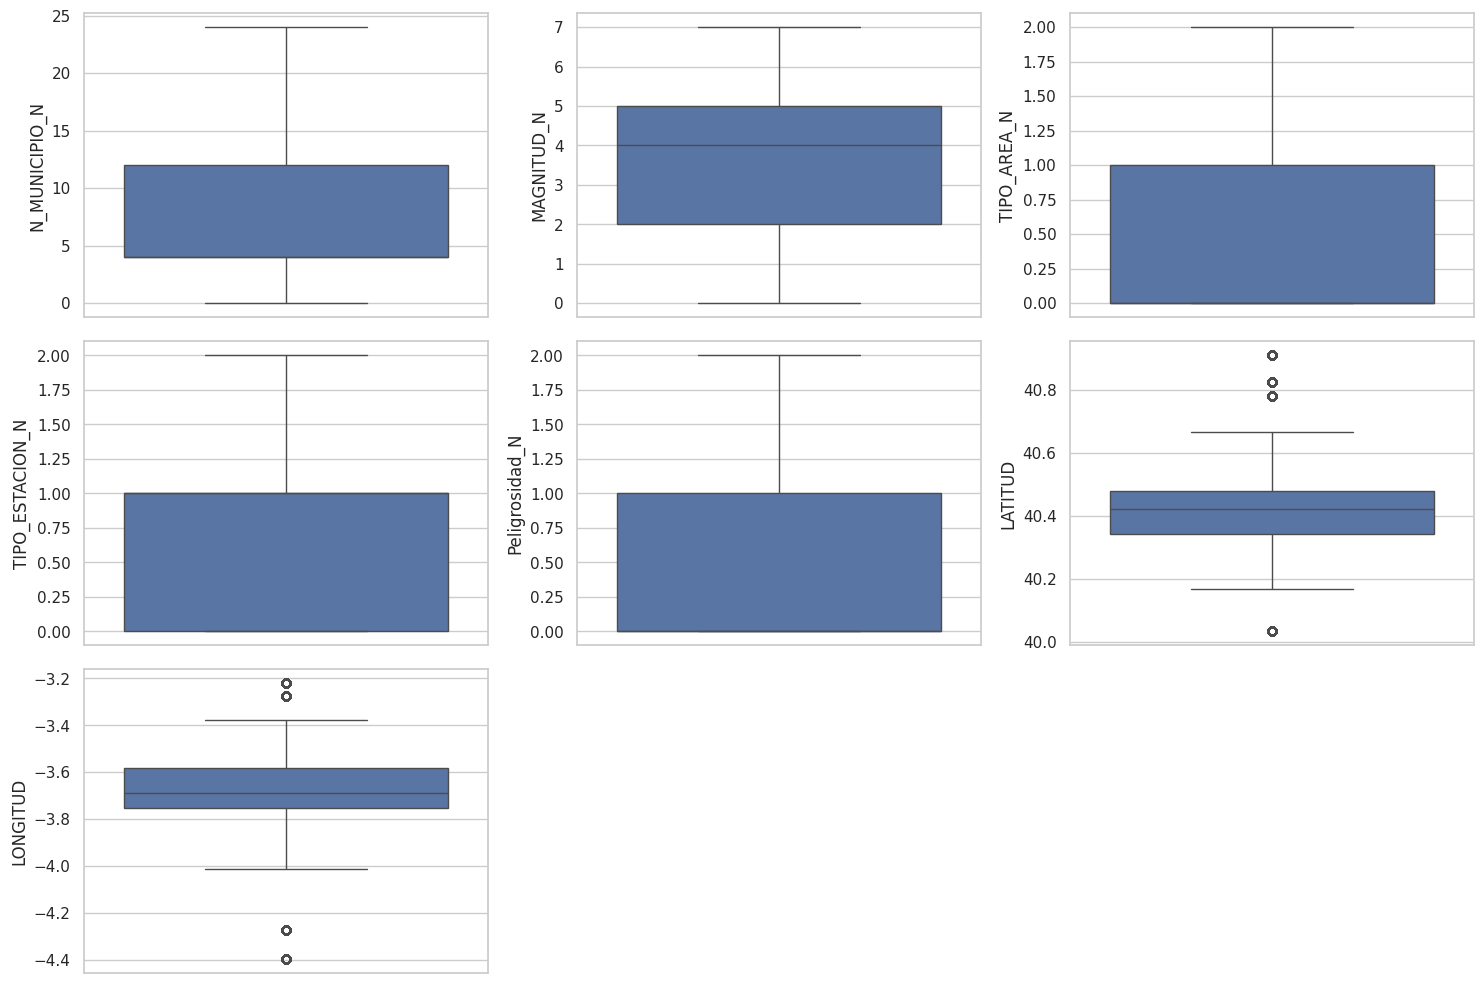

In [ ]:
columnas = ['N_MUNICIPIO_N', 'MAGNITUD_N', 'TIPO_AREA_N', 'TIPO_ESTACION_N', 'Peligrosidad_N', 'LATITUD', 'LONGITUD']

# Crear una figura con subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Iterar sobre cada eje y la correspondiente columna
for i in range(3):
    for j in range(3):
        # Calcula el índice de la columna basado en i y j
        idx = i * 3 + j
        # Si el índice es menor que el número de columnas, dibuja el boxplot
        if idx < len(columnas):
            sns.boxplot(ax=axes[i, j], data=madrid_df, y=columnas[idx])
        # Si no, elimina el eje
        else:
            fig.delaxes(axes[i, j])

# Ajustar el layout y mostrar el plot
plt.tight_layout()
plt.show()

**Really don't have to remove outliers, so leave the dataset the same.**

In [ ]:
madrid_df[madrid_df['Peligrosidad_N'] == 1]

,LATITUD,LONGITUD,Media_Diaria,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N,Peligrosidad_N
665,40.6339,-4.01425,2.175000,2,0,0,0,1
666,40.6339,-4.01425,2.045833,2,0,0,0,1
679,40.6339,-4.01425,2.179167,2,0,0,0,1
680,40.6339,-4.01425,2.120833,2,0,0,0,1
704,40.6339,-4.01425,2.062500,2,0,0,0,1
...,...,...,...,...,...,...,...,...
50905,40.1672,-3.27660,11.541667,13,6,2,0,1
50906,40.1672,-3.27660,14.166667,13,6,2,0,1
50907,40.1672,-3.27660,13.333333,13,6,2,0,1
50910,40.1672,-3.27660,13.333333,13,6,2,0,1


### **5. Feature scaling**

- Split the data in train and test.
- Scaling the data.

In [ ]:
from sklearn.model_selection import train_test_split

#Divido dataset en train y test

X = madrid_df.drop('Peligrosidad_N', axis =1)
y = madrid_df['Peligrosidad_N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 23)

X_train.to_csv('../data/processed/train_test/Xtrain.csv', index=False)
X_test.to_csv('../data/processed/train_test/Xtest.csv', index=False)
y_train.to_csv('../data/processed/train_test/ytrain.csv', index=False, header=['Peligrosidad_N'])
y_test.to_csv('../data/processed/train_test/ytest.csv', index=False, header=['Peligrosidad_N'])

In [ ]:
X_train.head()

,LATITUD,LONGITUD,Media_Diaria,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N
45585,40.63390,-4.01425,13.208333,2,6,0,0
41632,40.44610,-3.86890,8.333333,18,5,2,1
5723,40.28760,-3.22110,0.170833,8,1,1,1
43275,40.36770,-4.39810,11.833333,23,5,1,1
32816,40.31452,-3.71687,51.666667,16,4,0,0


In [ ]:
y_train.head()

45585    1
41632    0
5723     0
43275    0
32816    0
Name: Peligrosidad_N, dtype: int64